# Python e API

### O que é uma API?

- É um conjunto de códigos para usar um serviço/site/aplicativo específico. Cada site/ferramenta tem sua própria API. É importante que você saiba ler as APIs que precisar para saber usar

- Um dos padrões mais comuns em API é pegar informações em formato json, uma espécie de dicionário que precisa ser tratada no Python para podermos analisar

- As possibilidades de API são infinitas, vamos fazer 2 exemplos aqui: Cotação de Moedas e Envio de SMS.

- Sites como Google, Youtube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta/site grande tem uma API.

### O que precisamos:

- Quase sempre você precisa de uma conta para consumir uma API. Algumas APIs são abertas, como a https://docs.awesomeapi.com.br/api-de-moedas , mas em muitos casos (como veremos no caso do SMS) vamos precisar ter uma conta ativa para consumir a API

- A Documentação da API (ou exemplos da internet) é a chave para conseguir usar uma API 

#### Pegar a Cotação Atual de Todas as Moedas 

In [11]:
import requests
import json

cotacoes = requests.get(' https://economia.awesomeapi.com.br/json/all')
cotacoes_dict = cotacoes.json()
print(cotacoes_dict)


{'USD': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.7633', 'low': '5.71538', 'varBid': '-0.0103', 'pctChange': '-0.179305', 'bid': '5.7342', 'ask': '5.7372', 'timestamp': '1746706348', 'create_date': '2025-05-08 09:12:28'}, 'USDT': {'code': 'USD', 'codein': 'BRLT', 'name': 'Dólar Americano/Real Brasileiro Turismo', 'high': '5.80455', 'low': '5.75629', 'varBid': '-0.01037', 'pctChange': '-0.179241', 'bid': '5.77525', 'ask': '5.95366', 'timestamp': '1746706348', 'create_date': '2025-05-08 09:12:28'}, 'CAD': {'code': 'CAD', 'codein': 'BRL', 'name': 'Dólar Canadense/Real Brasileiro', 'high': '4.15622', 'low': '4.11581', 'varBid': '-0.02059', 'pctChange': '-0.496604', 'bid': '4.12575', 'ask': '4.13647', 'timestamp': '1746706334', 'create_date': '2025-05-08 09:12:14'}, 'GBP': {'code': 'GBP', 'codein': 'BRL', 'name': 'Libra Esterlina/Real Brasileiro', 'high': '7.67223', 'low': '7.59878', 'varBid': '0.01167', 'pctChange': '0.152781', 'bid': '7.64749',

#### Qual foi a última cotação do Dólar, do Euro e do BitCoin? (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [13]:
print('Dolar: {}'.format(cotacoes_dict['USD']['bid']))
print('Euro: {}'.format(cotacoes_dict['EUR']['bid']))
print('BitCoin: {}'.format(cotacoes_dict['BTC']['bid']))

Dolar: 5.7342
Euro: 6.47668
BitCoin: 571777


#### Pegar a cotação dos últimos 30 dias do dólar (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [23]:
cotacao_dolar_30_dias = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/30')
cotacao_dolar_30_dias_dict = cotacao_dolar_30_dias.json()

lista_cotacao = [float(item['bid']) for item in cotacao_dolar_30_dias_dict]
print(lista_cotacao)

[5.7161, 5.7445, 5.7133, 5.6864, 5.6516, 5.6774, 5.6725, 5.6187, 5.64763, 5.67839, 5.68393, 5.68443, 5.6788, 5.7035, 5.7198, 5.8057, 5.81464, 5.8054, 5.8067, 5.8655, 5.87641, 5.8543, 5.8642, 5.8576, 5.8838, 5.81252, 6.00467, 5.90753, 5.8356, 5.8396]


#### Pegar as cotações do BitCoin de Jan/20 a Out/20

In [45]:
cotacoes_btc = requests.get("https://economia.awesomeapi.com.br/json/daily/BTC-BRL/200?start_date=20200101&end_date=20201031")
cotacoes_btc_dict = cotacoes_btc.json()
lista_cotacao_btc = [float(item['bid']) for item in cotacoes_btc_dict]
lista_cotacao_btc.reverse()
print(lista_cotacao_btc)

[35750.0, 35150.0, 37025.0, 36836.7, 37415.0, 37158.0, 36652.1, 36800.0, 38000.1, 40050.0, 41050.0, 41212.0, 41715.0, 43392.0, 43070.0, 46424.7, 46610.0, 47626.0, 47900.0, 48553.0, 48852.0, 49700.0, 52500.0, 57700.0, 52609.1, 52499.0, 49225.0, 49700.0, 51488.8, 54450.0, 56208.0, 53609.0, 54207.4, 55300.0, 55651.1, 55760.8, 54831.8, 51440.0, 51400.0, 51600.0, 49560.0, 49735.0, 47625.1, 49000.2, 51700.3, 50650.0, 51500.0, 50865.1, 53600.0, 54001.0, 49500.4, 50400.6, 48820.6, 49133.5, 48096.8, 48201.0, 49350.0, 47000.0, 48100.1, 47788.9, 47750.0, 48501.4, 49679.0, 49290.6, 50405.0, 49700.0, 49750.0, 49782.0, 50710.0, 49759.1, 49800.0, 49755.0, 49915.1, 49678.2, 49746.8, 49840.0, 49960.0, 49800.0, 49208.8, 48815.5, 48993.1, 48850.0, 49890.0, 49900.1, 50360.1, 49890.0, 49905.9, 49750.0, 49920.0, 50041.3, 50073.4, 49868.0, 49320.0, 49702.1, 49651.8, 49680.0, 49516.5, 49143.0, 49321.0, 49850.0, 49951.1, 50400.2, 50402.0, 55300.0, 56161.0, 57490.0, 57330.0, 58950.0, 61298.1, 58296.3, 59800.0, 

#### Gráfico com as cotações do BitCoin

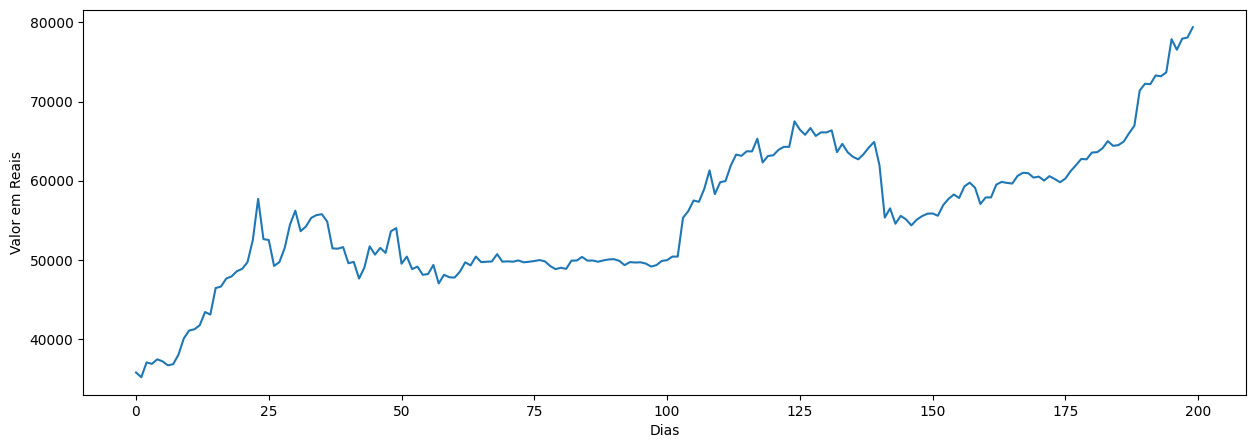

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(lista_cotacao_btc)
plt.xlabel('Dias')
plt.ylabel('Valor em Reais')
plt.show()